# Linear Regression

Comes in the form $y = mx + b$
* $m$ = slope
* $b$ = bias (in the case of ml lingo, otherwise, it's the intercept of the y axis)

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

First, we'll generate some random data with

$\theta_0 = 4$

$\theta_1 = 3$

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

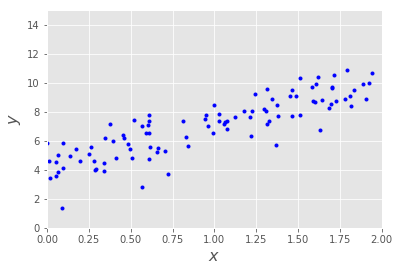

In [6]:
# plot x and y to see the relationship between the two

plt.plot(X, y, 'b.')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
_ = plt.axis([0,2,0,15])

Cool, our data has a nice linear relationship - it's also relatively simple: only one independent variable, $x$.

Now we'll express the equation for the line in machine learning lingo:
* We call $y$ our hypothesis and represent it as $J(\theta)$
* We call $b$ as $\theta_0$ and $m$ as $\theta_1$

### Solution 1: An Analytical Approach

First, we add abias unit to X that is 1 for every vector in X - this is for easing matrix multiplication to solve for Theta.

To solve for $\theta_0$ and $\theta_1$ we can use the following equation:

`theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)`

In [7]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.16481092]
 [2.97361906]]


**This is really close to our real thetas, 4 and 3. This is interesting given that our data is noisy...it's probably not accurate.**

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16481092],
       [10.11204903]])

**Let's plot the prediction line with calculated theta**

[0, 2, 0, 15]

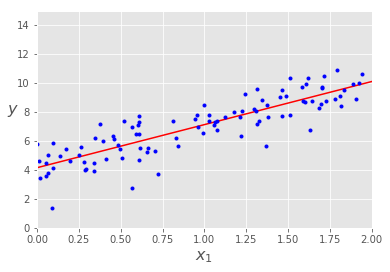

In [11]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.axis([0,2,0,15])

**The problem with this approach**

If the number of features in X starts increasing then the load on the CPU/GPU to do the matrix multiplication steps would start increasing. If the number of features gets really huge, like, millions of features, then calculating this would become infeasible for a computer.

This is where gradient descent comes in.

### Solution 2: Gradient Descent

Brief example of Gradient Descent: Suppose you're on a mountain, blindfolded, and your task is to come down from the mountain to the flat land without assistance. The only help you have is a gadget that tells you the height from sea-level. What would you do? Descend a little in some random direction and then ask the device for the current height. If the gadget tells you the height is higher than before then you know you're going the wrong way - you change the direction and repeat the process. You iterate until you reach the bottom.

Here is the analogy in machine learning terms:
* **Learning Rate** = size of steps taken in any direction
* **Cost Function** = gadget tells you the height
* **Gradients** = the direction of your steps

The mathematical representation of Gradient Descent is as follows:

**Cost**: $J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h(\theta)^{(i)}-y^{(i)})^2$

**Gradient**: $\frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h(\theta^{(i)}-y^{(i)}).X_j^{(i)}$

Basically, you take a random Theta vector and predict $h(\theta)$, then derive cost using the above equation (which represents **Mean Squared Error (MSE)**). 

When you try to minimize the cost, you would need to know your next step (or Theta). The partial derivative is osmething that can help to find the Theta for the next iteration.

The generalized form of calculating Theta's is as follows:

$\theta_0 := \theta_0 - \alpha.(\frac{1}{m} \sum_{i=1}^{m}(h(\theta^{(i)}-y^{(i)}).X_0^{(i)})$

$\theta_1 := \theta_1 - \alpha.(\frac{1}{m} \sum_{i=1}^{m}(h(\theta^{(i)}-y^{(i)}).X_1^{(i)})$

$\theta_2 := \theta_2 - \alpha.(\frac{1}{m} \sum_{i=1}^{m}(h(\theta^{(i)}-y^{(i)}).X_2^{(i)})$

$\theta_j := \theta_j - \alpha.(\frac{1}{m} \sum_{i=1}^{m}(h(\theta^{(i)}-y^{(i)}).X_0^{(i)})$

Where $a$ is the learning rate.

##### Coding Gradient Descent
What we need:
1. A cost function that calculates cost
2. A gradient descent function which calculates a new Theta vector

First, the cost function. It takes theta, X and y, where theta is a vector, X is a row vector, and y is a vector.

In [18]:
def calc_cost(theta, X, y):
    """
    Calculates the cost for given X and Y. The following shows an example of a single dimensional X
    theta = Vector of theta
    X     = Row of X's np.zeros((2, j))
    y     = Actual y's np.zeros((2, 1))
    
    where:
        j is the number of features
    """
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

Now, the Gradient Descent function. It takes three mandatory inputs: X, y, and theta. Learning rate and iterations can be adjusted. We call the cost function from within this.

In [15]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    """
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j, 1)
    learning_rate
    iterations = number of iterations
    
    Returns the final theta vector and array of cost history over number of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        
        prediction = np.dot(X, theta)
        
        theta = theta - (1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it] = calc_cost(theta, X, y)
        
    return theta, cost_history, theta_history

### Giving it a go
We need to find the $\theta_0$ and $\theta_1$ but we need to pass some theta vector in gradient descent. We'll start with random values of $\theta$ from a Guassian distribution, 1000 iterations, and a learning rate of 0.01.

In [20]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X),1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)

print(f'Theta0:            {theta[0][0]}\nTheta1:            {theta[1][0]}')
print(f'Final cost/MSE:    {cost_history[-1]}')

Theta0:            4.0974392184346335
Theta1:            3.032502502134172
Final cost/MSE:    5252.375568433029


Sweet! Why? We get $\theta_0 = 4.01$ and $\theta_1 = 3.03$ which are very close to our actual values of 4 and 3.

But do we really need to iterate 1000 times and use a learning rate of 0.01? 

To find this out we can look at how the cost varies with iterations, so lets plot `cost_history` against iterations:

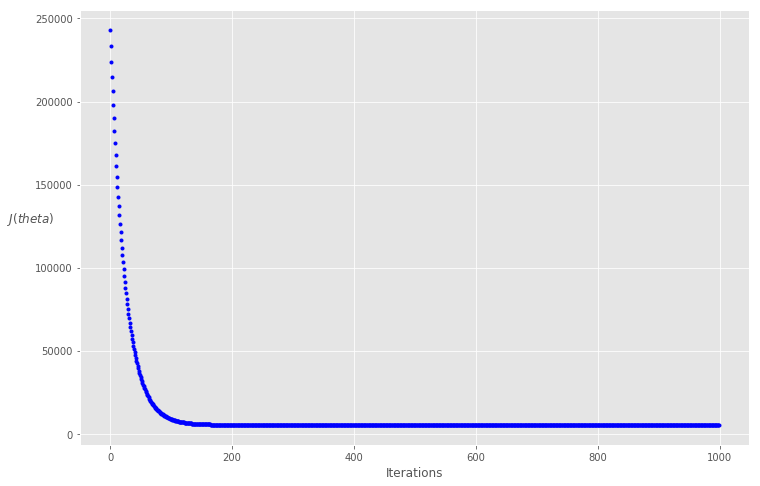

In [24]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel("$J(theta)$", rotation=0)
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter), cost_history, 'b.')

Hm...Looking at this graph we can see that the cost after about 175 iterations does not reduce - this means we can use only 200 iterations. 

Let's zoom in on the graph to see this:

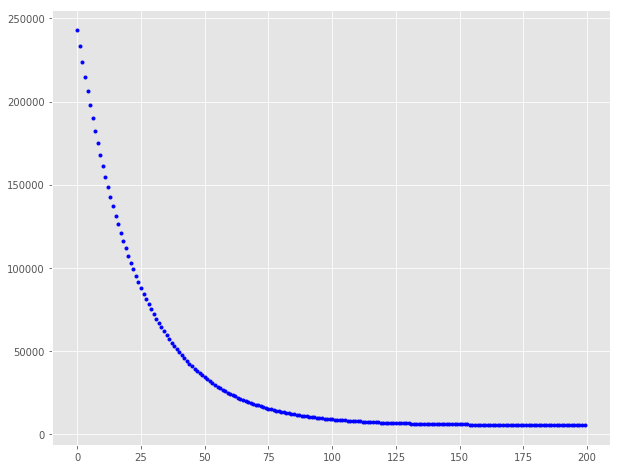

In [27]:
fig,ax = plt.subplots(figsize=(10,8))
_ = ax.plot(range(200),cost_history[:200],'b.')

##### Plotting Convergence and Cost vs. Iterations
It would be cool to see how the gradient descent actually converges to the solution with different learning rates and iterations.

So let's do it.

We'll plot graphs for convergence and cost vs. iterations for four combinations of iterations and learning rates.

First step: building a function which can show the effects together and also show how gradient decscent is actually working

In [28]:
def plot_GD(n_iter, lr, ax, ax1=None):
    """
    n_iter  = number of iterations
    lr      = Learning Rate
    ax      = Axis to plot the Gradient Descent
    ax1     = Axis to plot cost_history vs. Iterations plot
    """
    _ = ax.plot(X, y, 'b.')
    theta = np.random.randn(2, 1)
    
    tr = 0.1
    cost_history = np.zeros(n_iter)
    
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)
        
        cost_history[i] = h[0]
        
        if (i % 25 == 0):
            _ = ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1 == None:
        _ = ax1.plot(range(n_iter), cost_history, 'b.')

Now, plot the graps for different iterations and learning rates

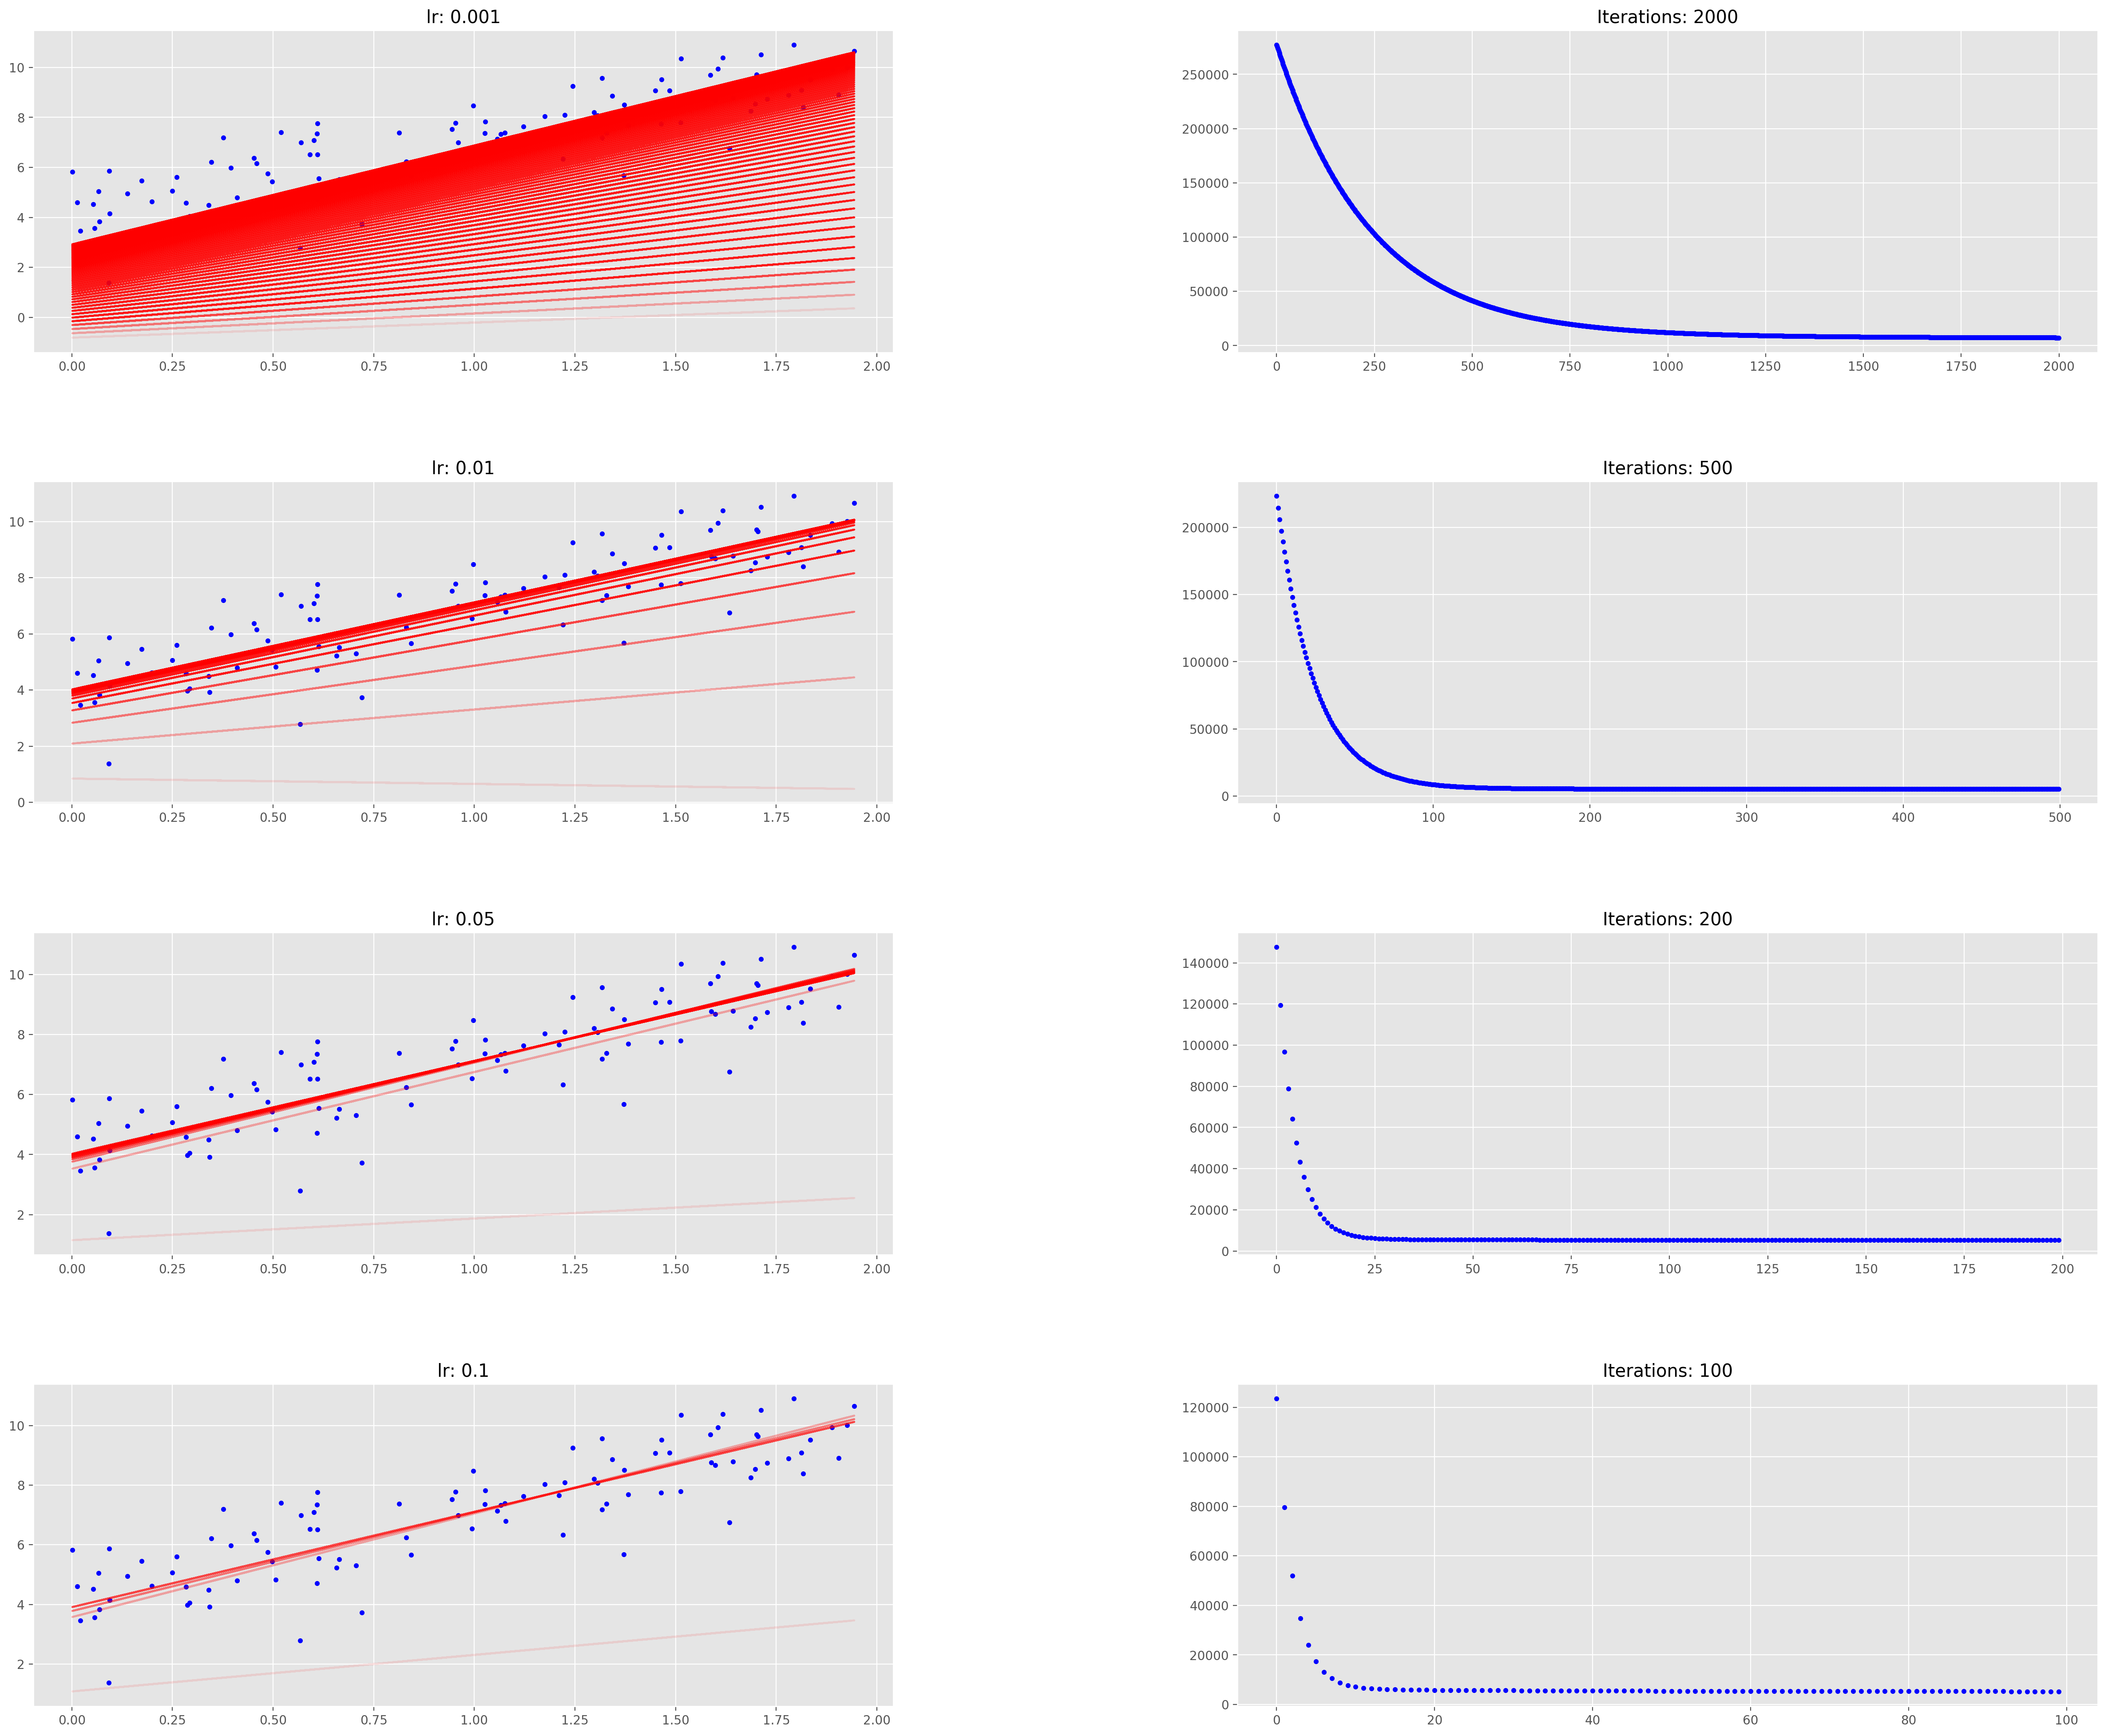

In [31]:
fig = plt.figure(figsize=(30,25), dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr = [(2000, 0.001), (500, 0.01), (200, 0.05), (100, 0.1)]
count = 0

for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
    
    ax1 = fig.add_subplot(4, 2, count)
    
    ax.set_title(f'lr: {lr}')
    ax1.set_title(f'Iterations: {n_iter}')
    plot_GD(n_iter, lr, ax, ax1)

## Stochastic Gradient Descent (SGD)
In our gradient descent algorithm, we computed the gradients on each observation one by one.

In Stochastic Gradient Descent, we can chose the observations randomly. It is called **stochastic** because samples are selcted randomly (or shuffled) instead of as a single group or in the order they appear in the training set.

In [32]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = number of iterations
    
    Returns the final theta vector and array of cost history over number of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, theta)
            
            theta = theta -(1/m)*learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += calc_cost(theta, X_i, y_i)
        cost_history[it] = cost
    
    return theta, cost_history

##### Giving it a go

In [34]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b =np.c_[np.ones((len(X), 1)), X]
theta, cost_history = stochastic_gradient_descent(X_b, y, theta, lr, n_iter)

print(f'Theta0:            {theta[0][0]}\nTheta1:            {theta[1][0]}')
print(f'Final cost/MSE:    {cost_history[-1]}')

Theta0:            3.818196393177671
Theta1:            3.265811234297831
Final cost/MSE:    47.080177748738805


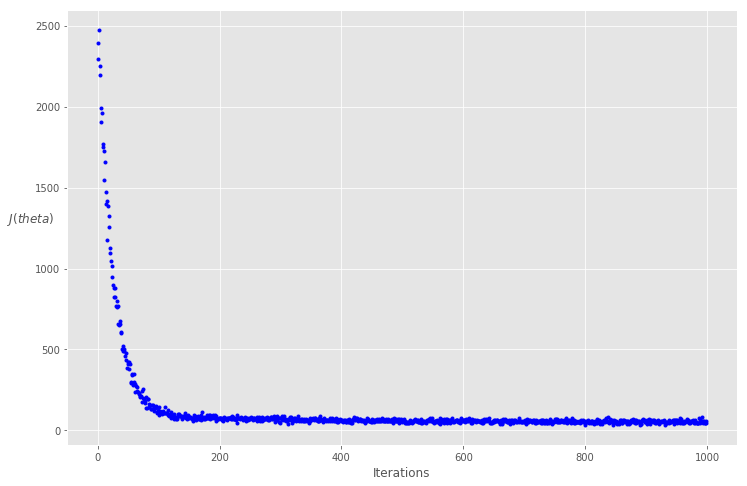

In [35]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel("$J(theta)$", rotation=0)
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter), cost_history, 'b.')

## Mini Batch Gradient Descent
In actual practice we use an approach called Mini batch gradient descent. This approach uses random samples but in batches - this means that we do not calculate the gradients for each observation but for a group of observations, resulting in a faster optimization!

A simple way to implement this is to shuffle the observations, create batches, and then proceed with gradient descent using batches.

In [36]:
def minibatch_gradient_descent(X, y, theta,learning_rate=0.01, iterations=10, batch_size=20):
    """
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m , batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            
            prediction = np.dot(X_i, theta)
            
            theta = theta -(1/m)*learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += calc_cost(theta, X_i, y_i)
        cost_history[it] = cost
    
    return theta, cost_history

In [37]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2,1)

theta, cost_history = minibatch_gradient_descent(X, y, theta, lr, n_iter)

print(f'Theta0:            {theta[0][0]}\nTheta1:            {theta[1][0]}')
print(f'Final cost/MSE:    {cost_history[-1]}')

Theta0:            3.7757653253422956
Theta1:            3.3136670159248
Final cost/MSE:    1092.7436572419704


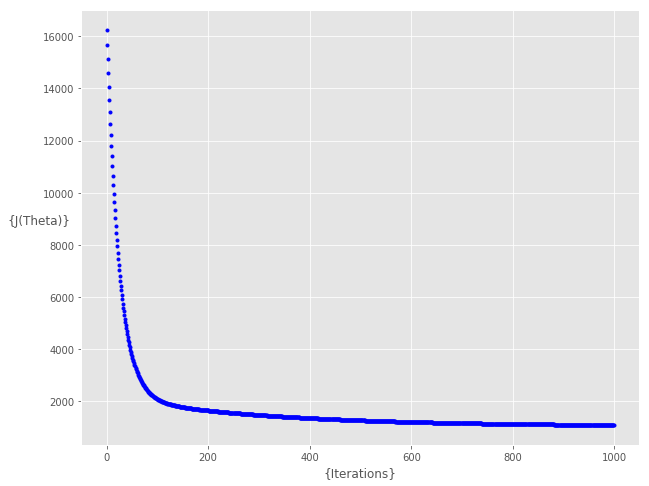

In [38]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')